# **Ανάλυση Πωλήσεων Ηλεκτρονικού Εμπορίου**
---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση του αρχείου
df = pd.read_excel('dataa.xlsx', header=1)

display(df.head())

,Ημερομηνία,Μήνας,Κατηγορία,Ποσότητα Πωλήσεων,Τιμή ανά Μονάδα,Έσοδα,Καμπάνια Μάρκετινγκ,Πλατφόρμα Πωλήσεων,Περιοχή Πελάτη,Ηλικιακή Ομάδα Πελάτη,Φύλο Πελάτη
0,2020-04-01,4,Ρουχισμός,14,40,560,Χειμερινές Εκπτώσεις,Mobile App,Ανατολική,45-54,Άνδρας
1,2020-09-26,9,Παιχνίδια,59,30,1770,Εαρινές Εκπτώσεις,Mobile App,Βόρεια,45-54,Γυναίκα
2,2020-05-21,5,Παιχνίδια,23,30,690,Εαρινές Εκπτώσεις,Mobile App,Ανατολική,25-34,Γυναίκα
3,2020-11-24,11,Βιβλία,189,20,3780,Χειμερινές Εκπτώσεις,Ιστοσελίδα,Νότια,25-34,Γυναίκα
4,2020-05-14,5,Ρουχισμός,154,40,6160,Χωρίς Καμπάνια,Mobile App,Νότια,65,Άνδρας


# Ανάλυση ανά Μήνα
---


In [ ]:
### Ανάλυση ανά Μήνα
monthly_sales = df.groupby('Μήνας')['Έσοδα'].sum()
monthly_revenue = df.groupby('Μήνας').agg({'Έσοδα': 'sum'}).reset_index()
display(monthly_revenue)

,Μήνας,Έσοδα
0,1,435060
1,2,450810
2,3,548450
3,4,515330
4,5,473390
5,6,512740
6,7,511280
7,8,530150
8,9,533450
9,10,427770


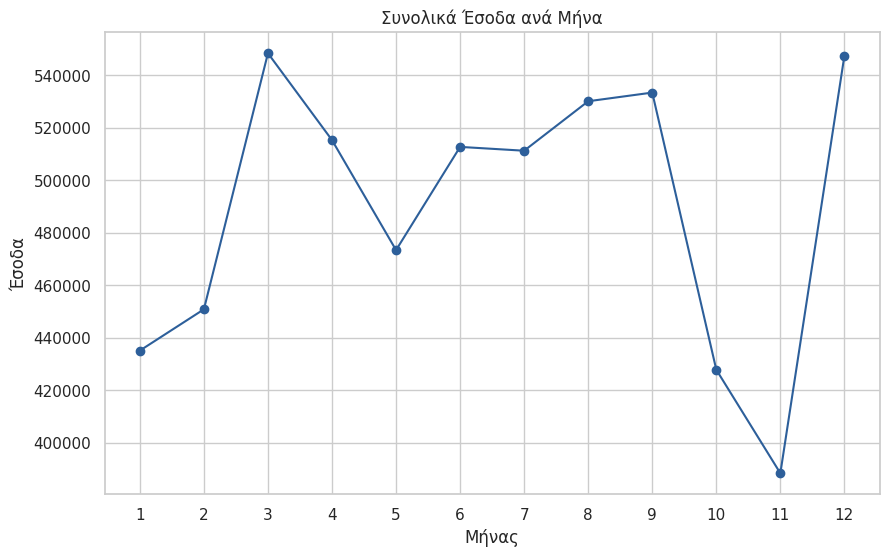

In [ ]:
# Δημιουργία γραμμικού διαγράμματος
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Μήνας'], monthly_revenue['Έσοδα'], marker='o', color='#2D5F9A', linestyle='-')
plt.title('Συνολικά Έσοδα ανά Μήνα')
plt.xlabel('Μήνας')
plt.ylabel('Έσοδα')
plt.xticks(range(1, 13))
plt.show()

<ipython-input-262-3759b636ad2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")


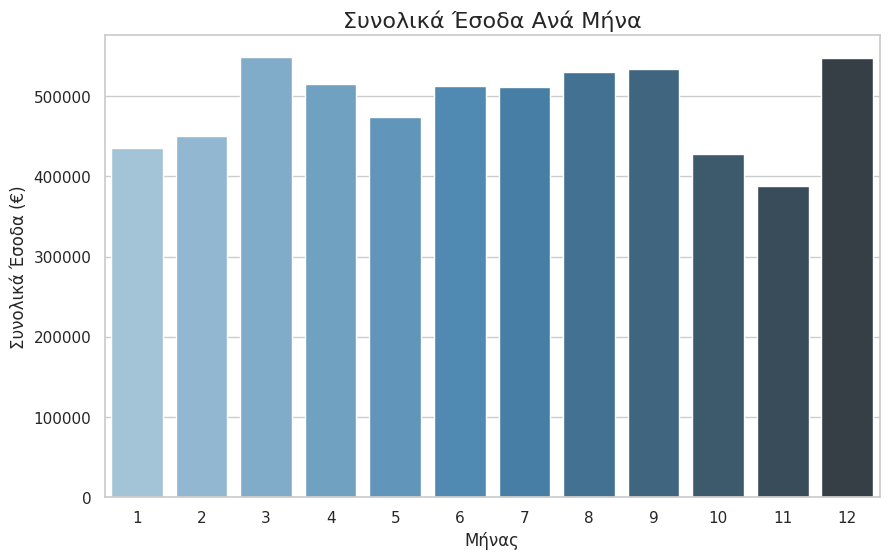

In [ ]:
# Γράφημα για τις πωλήσεις ανά μήνα
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")
plt.title("Συνολικά Έσοδα Ανά Μήνα", fontsize=16)
plt.xlabel("Μήνας", fontsize=12)
plt.ylabel("Συνολικά Έσοδα (€)", fontsize=12)
plt.show()

# Ανάλυση ανά εποχή
---


In [ ]:
# Δημιουργία λίστας για τις εποχές
def get_season(month):
    if month in [12, 1, 2]:
        return 'Χειμώνας'
    elif month in [3, 4, 5]:
        return 'Άνοιξη'
    elif month in [6, 7, 8]:
        return 'Καλοκαίρι'
    elif month in [9, 10, 11]:
        return 'Φθινόπωρο'

In [ ]:
# Προσθήκη στήλης για εποχή
df['Εποχή'] = df['Μήνας'].apply(get_season)
### Ανάλυση ανά Εποχή
seasonal_sales = df.groupby('Εποχή')['Έσοδα'].sum()
display(seasonal_sales)

,Έσοδα
Εποχή,
Άνοιξη,1537170
Καλοκαίρι,1554170
Φθινόπωρο,1349510
Χειμώνας,1433360


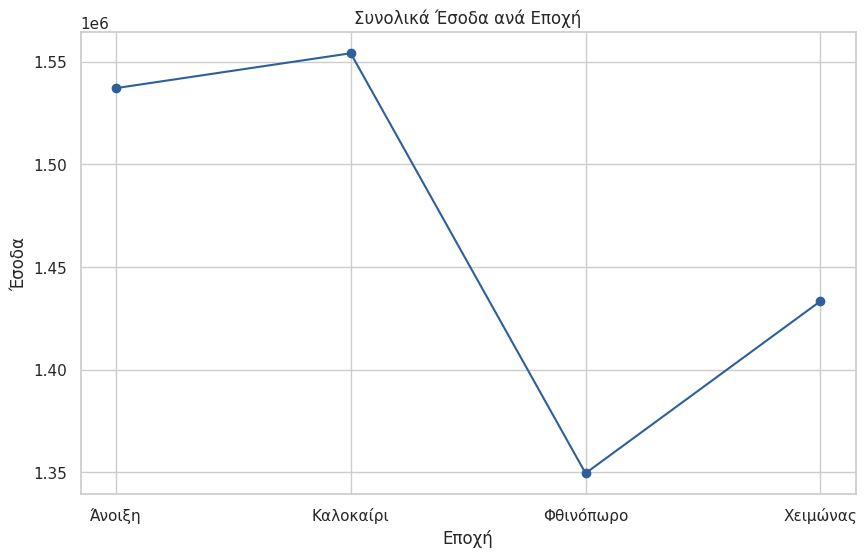

In [ ]:
# Δημιουργία γραμμικού διαγράμματος
plt.figure(figsize=(10, 6))

plt.plot(seasonal_sales.index, seasonal_sales.values, marker='o', color='#2D5F9A', linestyle='-')
plt.title('Συνολικά Έσοδα ανά Εποχή')
plt.xlabel('Εποχή')
plt.ylabel('Έσοδα')
plt.show()

<ipython-input-229-545ce64fc003>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3'])


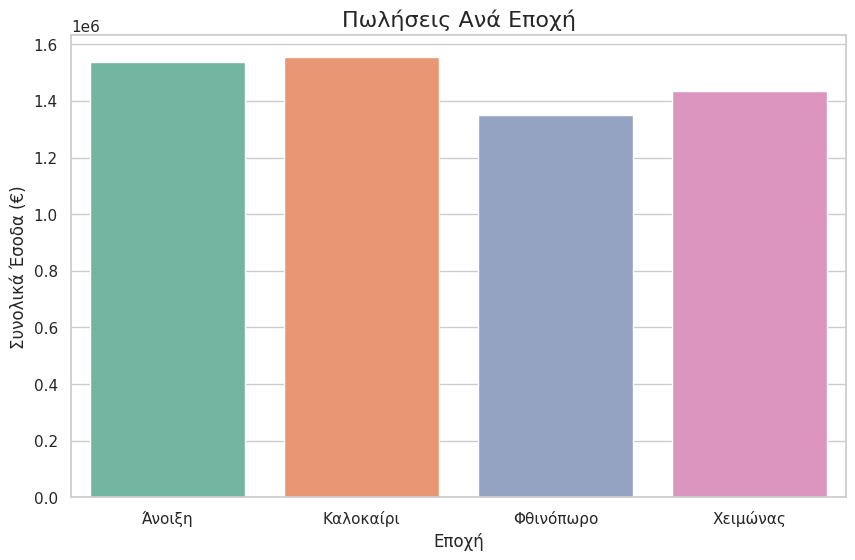

In [ ]:
# Γράφημα για τις πωλήσεις ανά εποχή
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3'])
plt.title("Πωλήσεις Ανά Εποχή", fontsize=16)
plt.xlabel("Εποχή", fontsize=12)
plt.ylabel("Συνολικά Έσοδα (€)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Ανάλυση ανά Καμπάνια Μάρκετινγκ
---


In [ ]:
### Ανάλυση Ανά Καμπάνια
campaign_sales = df.groupby('Καμπάνια Μάρκετινγκ')['Έσοδα'].sum()

<ipython-input-231-cd4f03752d97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_sales.index, y=campaign_sales.values, palette=['#45B39D','#D65DB1','#F4B400'])


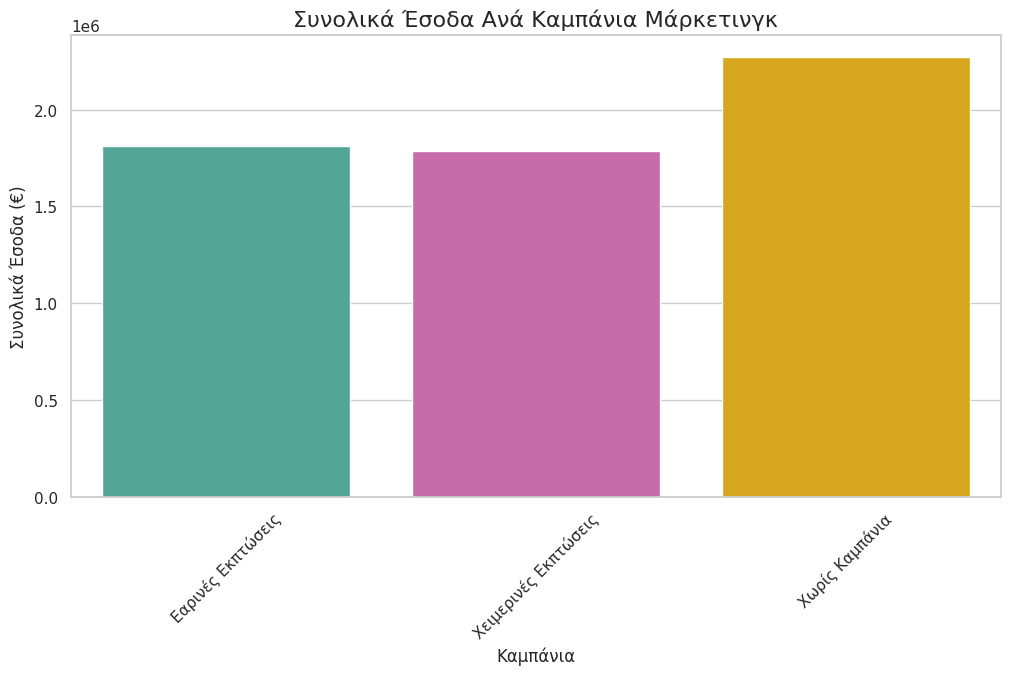

In [ ]:
# Γράφημα για τις πωλήσεις ανά καμπάνια
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_sales.index, y=campaign_sales.values, palette=['#45B39D','#D65DB1','#F4B400'])

plt.title("Συνολικά Έσοδα Ανά Καμπάνια Μάρκετινγκ", fontsize=16)
plt.xlabel("Καμπάνια", fontsize=12)
plt.ylabel("Συνολικά Έσοδα (€)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


---


In [ ]:
campaign_group = df.groupby('Καμπάνια Μάρκετινγκ').agg({
    'Ποσότητα Πωλήσεων': 'sum',
    'Έσοδα': 'sum'
}).reset_index()

- **Συνολικές Πωλήσεις ανά Καμπάνια Μάρκετινγκ**

<ipython-input-233-09ef2f099118>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


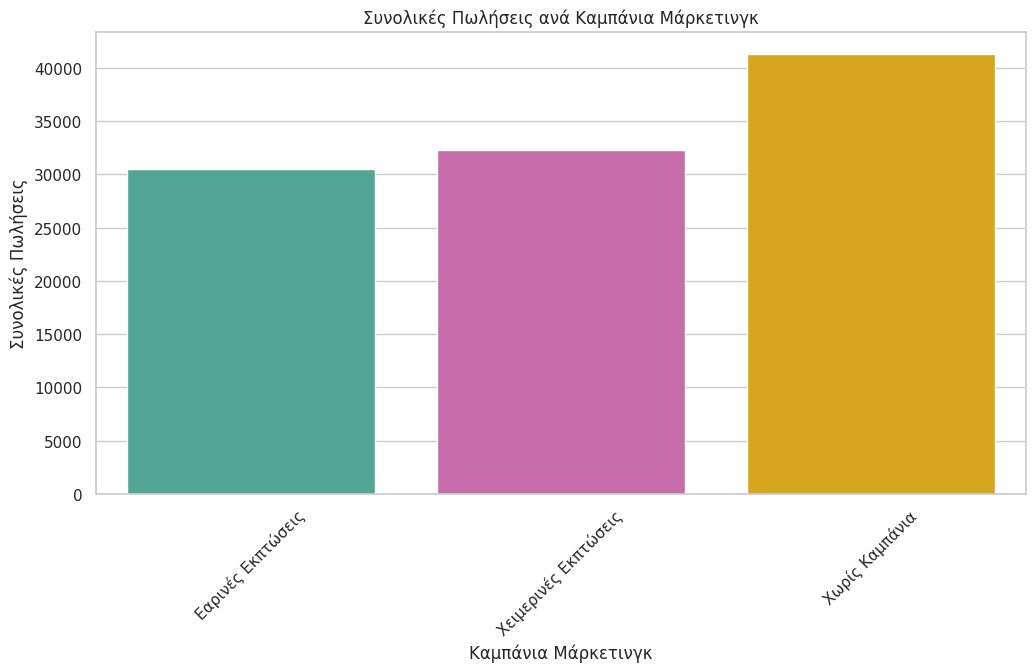

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=campaign_group['Καμπάνια Μάρκετινγκ'],
    y=campaign_group['Ποσότητα Πωλήσεων'],
    palette=['#45B39D', '#D65DB1', '#F4B400']
)

plt.title('Συνολικές Πωλήσεις ανά Καμπάνια Μάρκετινγκ')
plt.xlabel('Καμπάνια Μάρκετινγκ')
plt.ylabel('Συνολικές Πωλήσεις')
plt.xticks(rotation=45)
plt.show()


- **Αποδοτικότητα Καμπανιών Μάρκετινγκ**

In [ ]:
# Υπολογισμός αποδοτικότητας
campaign_group['Αποδοτικότητα'] = campaign_group['Έσοδα'] / campaign_group['Ποσότητα Πωλήσεων']
print('Η αποδοτικότητα για την κάθε καμπάνια είναι:')
for index, row in campaign_group.iterrows():
    print(f"{row['Καμπάνια Μάρκετινγκ']}: {row['Αποδοτικότητα']}")

Η αποδοτικότητα για την κάθε καμπάνια είναι:
Εαρινές Εκπτώσεις: 59.39383023316741
Χειμερινές Εκπτώσεις: 55.34911792014856
Χωρίς Καμπάνια: 55.0070204318776


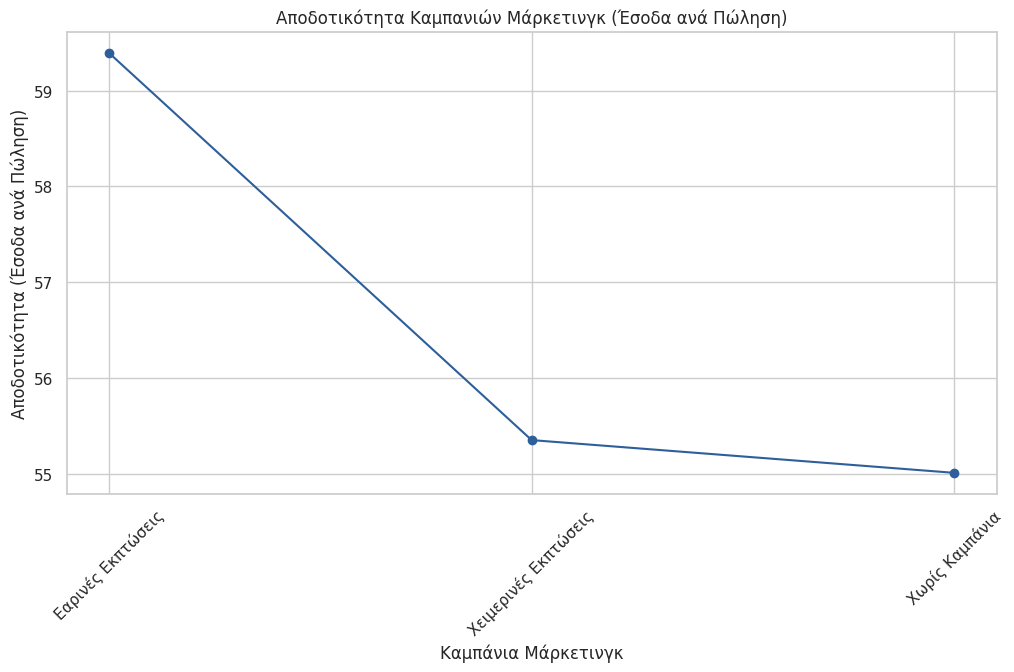

In [ ]:
# Line Graph: Αποδοτικότητα ανά καμπάνια
plt.figure(figsize=(12, 6))
plt.plot(campaign_group['Καμπάνια Μάρκετινγκ'], campaign_group['Αποδοτικότητα'], marker='o', color='#2D5F9A', linestyle='-')
plt.title('Αποδοτικότητα Καμπανιών Μάρκετινγκ (Έσοδα ανά Πώληση)')
plt.xlabel('Καμπάνια Μάρκετινγκ')
plt.ylabel('Αποδοτικότητα (Έσοδα ανά Πώληση)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

- **Heatmap Συνολικών Εσόδων, Πωλήσεων και Αποδοτικότητας ανά Καμπάνια**

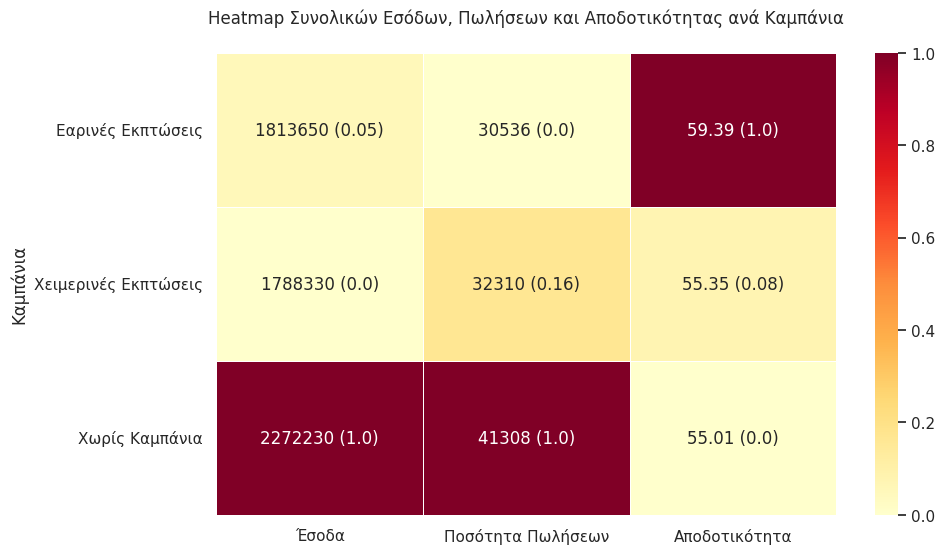

In [ ]:
campaign_data = df.groupby('Καμπάνια Μάρκετινγκ').agg(
    {'Έσοδα': 'sum', 'Ποσότητα Πωλήσεων': 'sum'}
)
campaign_data['Αποδοτικότητα'] = campaign_data['Έσοδα'] / campaign_data['Ποσότητα Πωλήσεων']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(campaign_data[['Έσοδα', 'Ποσότητα Πωλήσεων', 'Αποδοτικότητα']])
normalized_df = pd.DataFrame(normalized_data, columns=['Έσοδα', 'Ποσότητα Πωλήσεων', 'Αποδοτικότητα'], index=campaign_data.index)

annot_data = normalized_df.copy()
for col in ['Έσοδα', 'Ποσότητα Πωλήσεων', 'Αποδοτικότητα']:
    annot_data[col] = (campaign_data[col].round(2).astype(str) +
                       " (" + normalized_df[col].round(2).astype(str) + ")")

plt.figure(figsize=(10, 6))
sns.heatmap(
    normalized_df,
    annot=annot_data,
    cmap='YlOrRd',
    fmt="",
    linewidths=.5
)

plt.title('Heatmap Συνολικών Εσόδων, Πωλήσεων και Αποδοτικότητας ανά Καμπάνια\n')
plt.ylabel('Καμπάνια')
plt.show()

# Ανάλυση ανά ηλικιακή ομάδα
---


In [ ]:
# Ανάλυση ανά Ηλικιακή Ομάδα
age_group_sales = df.groupby('Ηλικιακή Ομάδα Πελάτη')['Έσοδα'].sum().sort_values(ascending=False)

- **Αναλογία Εσόδων ανά Ηλικιακή Ομάδα**

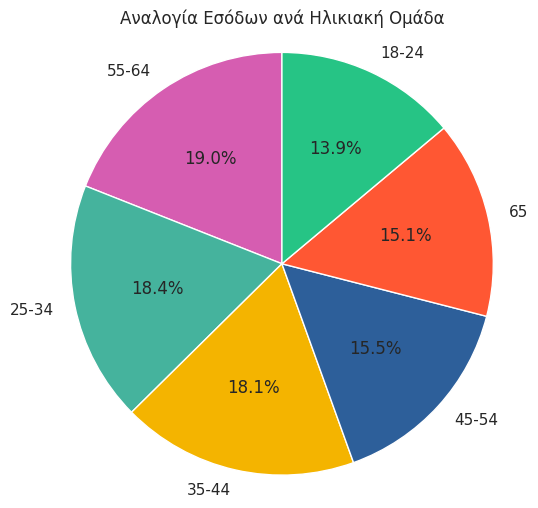

In [ ]:
# Υπολογισμός ποσοστών από τα συνολικά έσοδα
total_sales = age_group_sales_sorted.sum()
age_group_sales_sorted_percent = (age_group_sales_sorted / total_sales) * 100

age_group_sales_sorted_percent = age_group_sales_sorted_percent.round(1)

difference = 100 - age_group_sales_sorted_percent.sum()
age_group_sales_sorted_percent.iloc[0] += difference  # Προσθέτουμε τη διαφορά στο πρώτο ποσοστό

# Δημιουργία του Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(age_group_sales_sorted_percent, labels=age_group_sales_sorted_percent.index, autopct='%1.1f%%', startangle=90, colors=['#D65DB1', '#45B39D', '#F4B400', '#2D5F9A', '#FF5733', '#26C485'])
plt.title('Αναλογία Εσόδων ανά Ηλικιακή Ομάδα')
plt.axis('equal')
plt.show()


- **Συνολικά Έσοδα ανά Ηλικιακή Ομάδα**

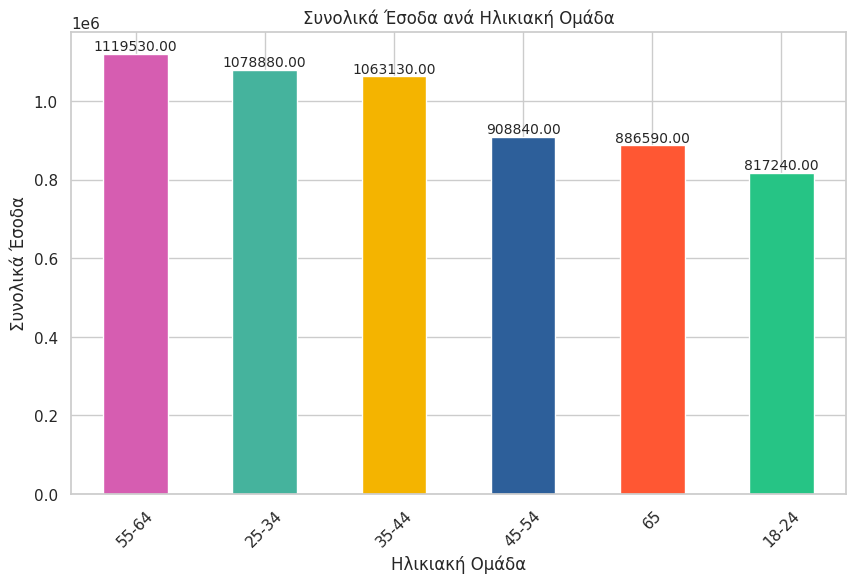

In [ ]:
plt.figure(figsize=(10, 6))
age_group_sales.plot(kind='bar', color=['#D65DB1', '#45B39D', '#F4B400', '#2D5F9A', '#FF5733', '#26C485'])

plt.title('Συνολικά Έσοδα ανά Ηλικιακή Ομάδα')
plt.xlabel('Ηλικιακή Ομάδα')
plt.ylabel('Συνολικά Έσοδα')
plt.xticks(rotation=45)

for i, value in enumerate(age_group_sales):
    plt.text(i, value + 1000, f'{value:.2f}', ha='center', va='bottom', fontsize=10)
plt.grid(True)
plt.show()


# Ανάλυση ανά φύλο
---


In [ ]:
# Ανάλυση ανά Φύλο
gender_sales = df.groupby('Φύλο Πελάτη')['Έσοδα'].sum().sort_values(ascending=False)

- **Αναλογία Εσόδων ανά Φύλο Πελάτη**

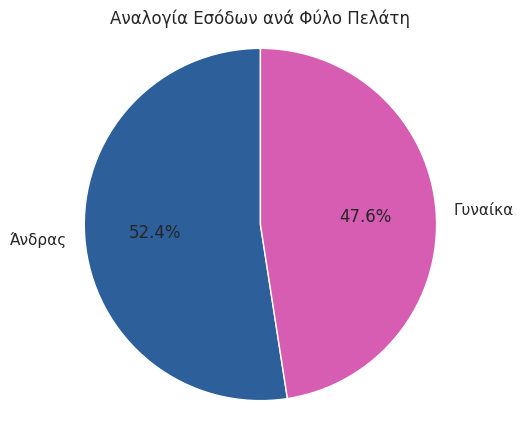

In [ ]:
# Δημιουργία Pie Chart για Φύλο
plt.figure(figsize=(5, 5))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=90, colors=['#2D5F9A','#D65DB1'])
plt.title('Αναλογία Εσόδων ανά Φύλο Πελάτη')
plt.axis('equal')
plt.show()

- **Συνολικά Έσοδα ανά Φύλο Πελάτη**

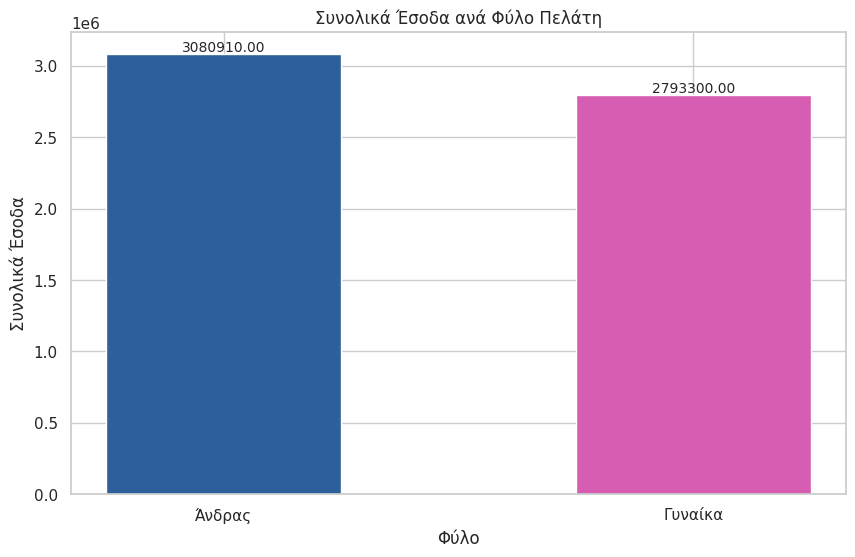

In [ ]:
colors = ['#2D5F9A', '#D65DB1']

plt.figure(figsize=(10, 6))

bar_width = 0.5
x_positions = range(len(gender_sales))

for i, (index, value) in enumerate(gender_sales.items()):
    plt.bar(i, value, color=colors[i], width=bar_width)

plt.title('Συνολικά Έσοδα ανά Φύλο Πελάτη')
plt.xlabel('Φύλο')
plt.ylabel('Συνολικά Έσοδα')
plt.xticks(x_positions, gender_sales.index, rotation=0)

for i, value in enumerate(gender_sales):
    plt.text(i, value + 1000, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

- **Συνολικά Έσοδα ανά Ηλικιακή Ομάδα και Φύλο**

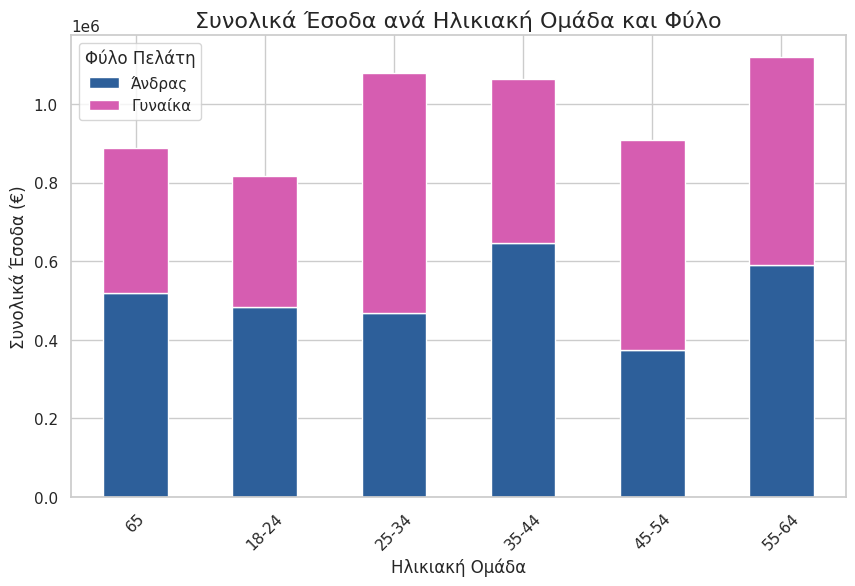

In [ ]:
age_gender_crosstab = pd.crosstab(
    df['Ηλικιακή Ομάδα Πελάτη'],
    df['Φύλο Πελάτη'],
    values=df['Έσοδα'],
    aggfunc='sum'
)

age_gender_crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#2D5F9A', '#D65DB1']
)

plt.title('Συνολικά Έσοδα ανά Ηλικιακή Ομάδα και Φύλο', fontsize=16)
plt.xlabel('Ηλικιακή Ομάδα', fontsize=12)
plt.ylabel('Συνολικά Έσοδα (€)', fontsize=12)
plt.legend(title='Φύλο Πελάτη', labels=['Άνδρας', 'Γυναίκα'])
plt.xticks(rotation=45)

plt.show()


- **Ποσότητα Πωλήσεων ανά Κατηγορία Προϊόντος για Άνδρες και Γυναίκες**

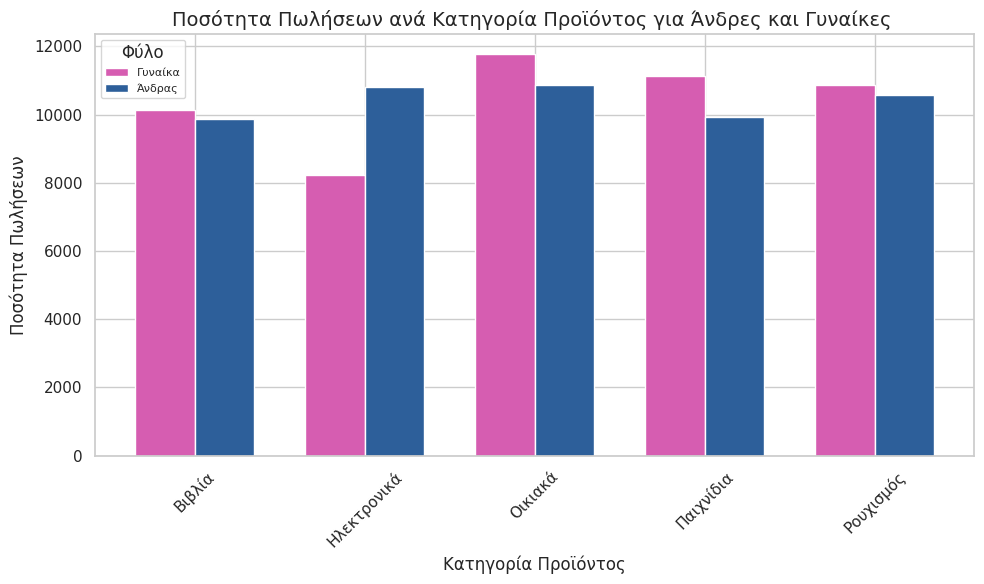

In [ ]:
# Ομαδοποίηση δεδομένων ανά φύλο και κατηγορία προϊόντος, και άθροισμα της ποσότητας πωλήσεων
gender_category_sales = df.groupby(['Φύλο Πελάτη', 'Κατηγορία'])['Ποσότητα Πωλήσεων'].sum().unstack()

categories = gender_category_sales.columns
num_categories = len(categories)

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Δημιουργία των bars για κάθε κατηγορία προϊόντος
for i, category in enumerate(categories):
    plt.bar(i - bar_width / 2, gender_category_sales.loc['Γυναίκα', category], bar_width , color='#D65DB1')
    plt.bar(i + bar_width / 2, gender_category_sales.loc['Άνδρας', category], bar_width, color='#2D5F9A')

plt.title('Ποσότητα Πωλήσεων ανά Κατηγορία Προϊόντος για Άνδρες και Γυναίκες ', fontsize=14)
plt.xlabel('Κατηγορία Προϊόντος', fontsize=12)
plt.ylabel('Ποσότητα Πωλήσεων', fontsize=12)
plt.xticks(range(num_categories), categories, rotation=45)
plt.legend(title='Φύλο', labels=['Γυναίκα' , 'Άνδρας'], fontsize=8)

plt.tight_layout()
plt.show()


- **Ποσοστό Αγορών ανά Κατηγορία Προϊόντος ανά Ηλικιακή Ομάδα**

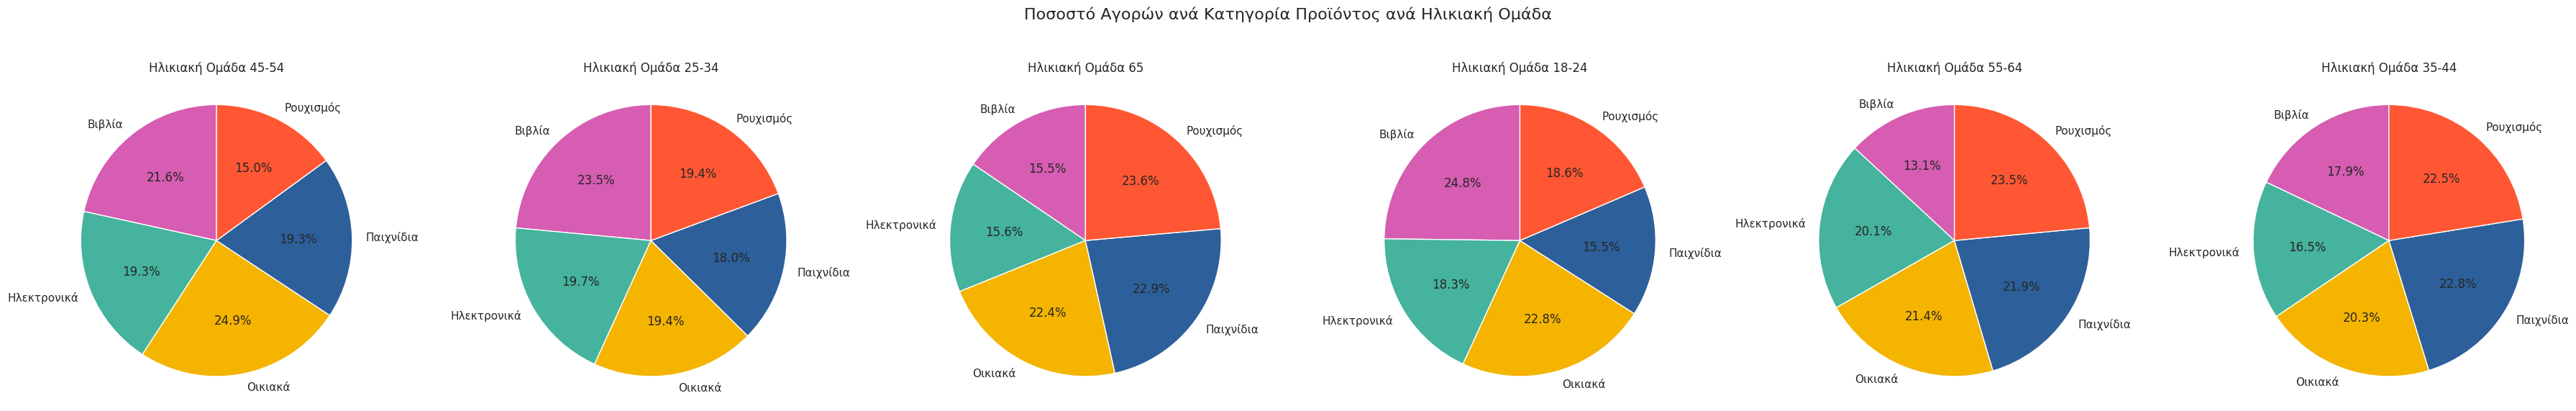

In [ ]:
age_groups = df['Ηλικιακή Ομάδα Πελάτη'].unique()

fig, axes = plt.subplots(1, len(age_groups), figsize=(len(age_groups) * 6, 6))
fig.suptitle('Ποσοστό Αγορών ανά Κατηγορία Προϊόντος ανά Ηλικιακή Ομάδα', fontsize=16)

colors = ['#D65DB1', '#45B39D', '#F4B400', '#2D5F9A', '#FF5733']

for i, age_group in enumerate(age_groups):
    age_group_data = df[df['Ηλικιακή Ομάδα Πελάτη'] == age_group]

    product_category_sales = age_group_data.groupby('Κατηγορία')['Ποσότητα Πωλήσεων'].sum()

    axes[i].pie(
        product_category_sales,
        labels=product_category_sales.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    axes[i].set_title(f'Ηλικιακή Ομάδα {age_group}', fontsize=12)
    axes[i].axis('equal')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# **Cluster Analysis**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

clustering_features = [
                       'Ηλικιακή Ομάδα Πελάτη',
                       'Φύλο Πελάτη',
                       'Έσοδα',
                       'Ποσότητα Πωλήσεων',
                       'Καμπάνια Μάρκετινγκ',
                       'Κατηγορία',
                       'Πλατφόρμα Πωλήσεων',
                       'Περιοχή Πελάτη'
                       ]

clustering_data = df[clustering_features].copy()

clustering_data.reset_index(drop=True, inplace=True)

for column in clustering_features:
    if column in ['Φύλο Πελάτη',
                  'Καμπάνια Μάρκετινγκ',
                  'Κατηγορία',
                  'Πλατφόρμα Πωλήσεων',
                  'Περιοχή Πελάτη',
                  'Ηλικιακή Ομάδα Πελάτη']:
      clustering_data[column] = clustering_data[column].astype(str)
    else:
      clustering_data[column] = clustering_data[column].astype(float)


# Label Encoding
clustering_data['Φύλο Πελάτη'] = clustering_data['Φύλο Πελάτη'].map({'Άνδρας':0, 'Γυναίκα':1})
clustering_data['Πλατφόρμα Πωλήσεων'] = clustering_data['Πλατφόρμα Πωλήσεων'].map({'Mobile App':0, 'Ιστοσελίδα':1})
clustering_data['Καμπάνια Μάρκετινγκ'] = clustering_data['Καμπάνια Μάρκετινγκ'].map({'Χωρίς Καμπάνια':0, 'Χειμερινές Εκπτώσεις':1, 'Εαρινές Εκπτώσεις':2})

# One-Hot Encoding
clustering_data = pd.get_dummies(clustering_data, columns=['Κατηγορία', 'Περιοχή Πελάτη','Ηλικιακή Ομάδα Πελάτη'])
b_columns = clustering_data.select_dtypes(include=['bool']).columns
clustering_data[b_columns] = clustering_data[b_columns].astype(int)

# αποτελέσματα
display(clustering_data.head())

,Φύλο Πελάτη,Έσοδα,Ποσότητα Πωλήσεων,Καμπάνια Μάρκετινγκ,Πλατφόρμα Πωλήσεων,Κατηγορία_Βιβλία,Κατηγορία_Ηλεκτρονικά,Κατηγορία_Οικιακά,Κατηγορία_Παιχνίδια,Κατηγορία_Ρουχισμός,Περιοχή Πελάτη_Ανατολική,Περιοχή Πελάτη_Βόρεια,Περιοχή Πελάτη_Δυτική,Περιοχή Πελάτη_Νότια,Ηλικιακή Ομάδα Πελάτη_18-24,Ηλικιακή Ομάδα Πελάτη_25-34,Ηλικιακή Ομάδα Πελάτη_35-44,Ηλικιακή Ομάδα Πελάτη_45-54,Ηλικιακή Ομάδα Πελάτη_55-64,Ηλικιακή Ομάδα Πελάτη_65
0,0,560.0,14.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,1,1770.0,59.0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,1,690.0,23.0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,1,3780.0,189.0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,6160.0,154.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Κανονικοποίηση δεδομένων
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)
scaled_data = pd.DataFrame(scaled_data, columns=clustering_data.columns)
display(scaled_data)

,Φύλο Πελάτη,Έσοδα,Ποσότητα Πωλήσεων,Καμπάνια Μάρκετινγκ,Πλατφόρμα Πωλήσεων,Κατηγορία_Βιβλία,Κατηγορία_Ηλεκτρονικά,Κατηγορία_Οικιακά,Κατηγορία_Παιχνίδια,Κατηγορία_Ρουχισμός,Περιοχή Πελάτη_Ανατολική,Περιοχή Πελάτη_Βόρεια,Περιοχή Πελάτη_Δυτική,Περιοχή Πελάτη_Νότια,Ηλικιακή Ομάδα Πελάτη_18-24,Ηλικιακή Ομάδα Πελάτη_25-34,Ηλικιακή Ομάδα Πελάτη_35-44,Ηλικιακή Ομάδα Πελάτη_45-54,Ηλικιακή Ομάδα Πελάτη_55-64,Ηλικιακή Ομάδα Πελάτη_65
0,-1.016130,-0.873125,-1.676603,0.097482,-0.974329,-0.495308,-0.484322,-0.535725,-0.493742,2.038293,1.882938,-0.588128,-0.600453,-0.589668,-0.415130,-0.468521,-0.466933,2.308487,-0.455773,-0.442913
1,0.984126,-0.674322,-0.839733,1.300957,-0.974329,-0.495308,-0.484322,-0.535725,2.025350,-0.490607,-0.531085,1.700309,-0.600453,-0.589668,-0.415130,-0.468521,-0.466933,2.308487,-0.455773,-0.442913
2,0.984126,-0.851766,-1.509229,1.300957,-0.974329,-0.495308,-0.484322,-0.535725,2.025350,-0.490607,1.882938,-0.588128,-0.600453,-0.589668,-0.415130,2.134375,-0.466933,-0.433184,-0.455773,-0.442913
3,0.984126,-0.344079,1.577889,0.097482,1.026347,2.018946,-0.484322,-0.535725,-0.493742,-0.490607,-0.531085,-0.588128,-0.600453,1.695868,-0.415130,2.134375,-0.466933,-0.433184,-0.455773,-0.442913
4,-1.016130,0.046955,0.926991,-1.105994,-0.974329,-0.495308,-0.484322,-0.535725,-0.493742,2.038293,-0.531085,-0.588128,-0.600453,1.695868,-0.415130,-0.468521,-0.466933,-0.433184,-0.455773,2.257778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.984126,3.298452,1.280336,-1.105994,1.026347,-0.495308,2.064742,-0.535725,-0.493742,-0.490607,-0.531085,-0.588128,-0.600453,1.695868,-0.415130,-0.468521,-0.466933,2.308487,-0.455773,-0.442913
996,0.984126,-0.028623,1.596486,0.097482,-0.974329,-0.495308,-0.484322,-0.535725,2.025350,-0.490607,-0.531085,-0.588128,-0.600453,1.695868,-0.415130,-0.468521,-0.466933,-0.433184,-0.455773,2.257778
997,0.984126,-0.482091,0.796811,-1.105994,1.026347,2.018946,-0.484322,-0.535725,-0.493742,-0.490607,1.882938,-0.588128,-0.600453,-0.589668,2.408884,-0.468521,-0.466933,-0.433184,-0.455773,-0.442913
998,-1.016130,-0.577385,-0.839733,1.300957,-0.974329,-0.495308,-0.484322,-0.535725,-0.493742,2.038293,-0.531085,-0.588128,1.665408,-0.589668,-0.415130,-0.468521,-0.466933,-0.433184,-0.455773,2.257778


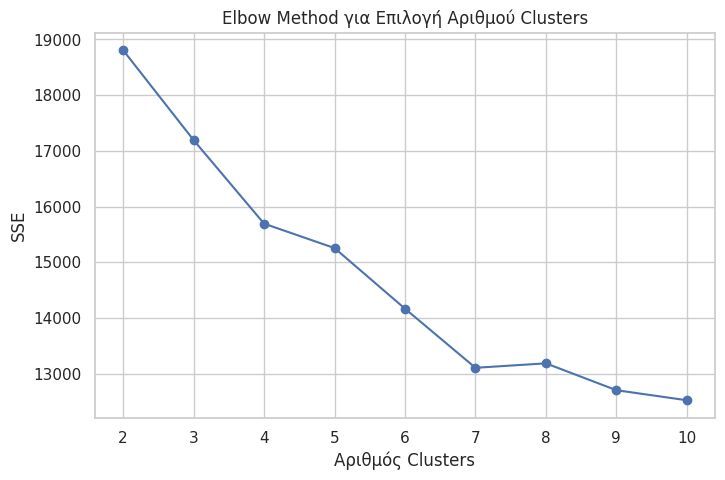

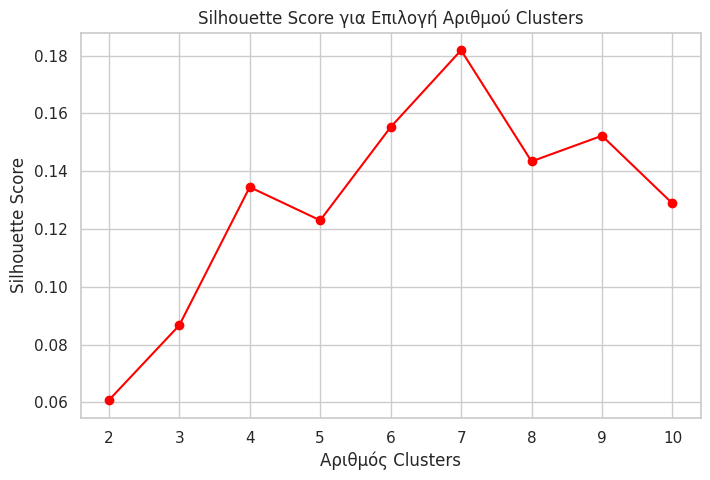

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Έλεγχος για τον αριθμό clusters
sse = []
silhouette_scores = []
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Γράφημα για Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, sse, marker='o')
plt.title('Elbow Method για Επιλογή Αριθμού Clusters')
plt.xlabel('Αριθμός Clusters')
plt.ylabel('SSE')
plt.show()

# Γράφημα για Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score για Επιλογή Αριθμού Clusters')
plt.xlabel('Αριθμός Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

cluster_df = clustering_data.copy()

cluster_df['cluster'] = clusters

display(cluster_df)

,Φύλο Πελάτη,Έσοδα,Ποσότητα Πωλήσεων,Καμπάνια Μάρκετινγκ,Πλατφόρμα Πωλήσεων,Κατηγορία_Βιβλία,Κατηγορία_Ηλεκτρονικά,Κατηγορία_Οικιακά,Κατηγορία_Παιχνίδια,Κατηγορία_Ρουχισμός,Περιοχή Πελάτη_Ανατολική,Περιοχή Πελάτη_Βόρεια,Περιοχή Πελάτη_Δυτική,Περιοχή Πελάτη_Νότια,Ηλικιακή Ομάδα Πελάτη_18-24,Ηλικιακή Ομάδα Πελάτη_25-34,Ηλικιακή Ομάδα Πελάτη_35-44,Ηλικιακή Ομάδα Πελάτη_45-54,Ηλικιακή Ομάδα Πελάτη_55-64,Ηλικιακή Ομάδα Πελάτη_65,cluster
0,0,560.0,14.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,6
1,1,1770.0,59.0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,6
2,1,690.0,23.0,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,5
3,1,3780.0,189.0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5
4,0,6160.0,154.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,25950.0,173.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,2
996,1,5700.0,190.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,3
997,1,2940.0,147.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,4
998,0,2360.0,59.0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,3


<Axes: xlabel='tsne1', ylabel='tsne2'>

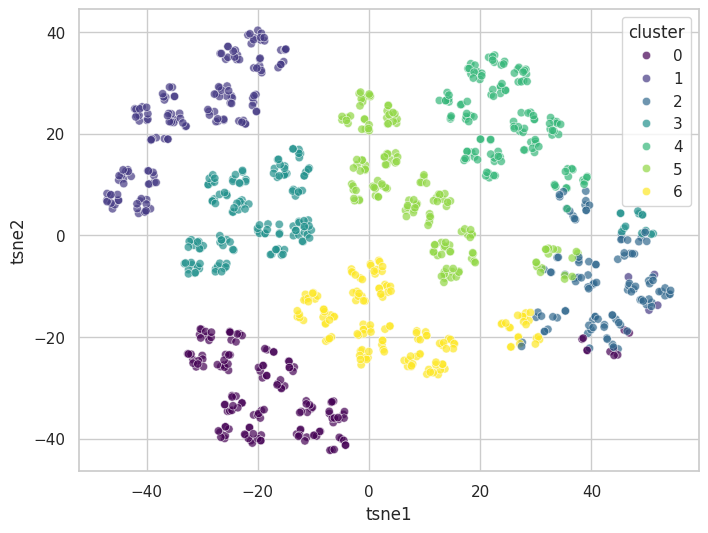

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(tsne_data, columns=['tsne1', 'tsne2'])
tsne_df['cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='tsne1', y='tsne2', hue='cluster', palette='viridis', alpha=0.7)

 - **Ανάλυση των clusters**


In [ ]:
# Ανάλυση των clusters (μέσος όρος και συνολικά έσοδα ανά cluster)
cluster_summary = cluster_df.groupby('cluster').agg({
    'Έσοδα': 'mean',
    'Ποσότητα Πωλήσεων': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_18-24': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_25-34': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_35-44': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_45-54': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_55-64': 'mean',
    'Ηλικιακή Ομάδα Πελάτη_65': 'mean',
    'Φύλο Πελάτη': 'mean',
    'Πλατφόρμα Πωλήσεων': 'mean',
    'Περιοχή Πελάτη_Βόρεια': 'mean',
    'Περιοχή Πελάτη_Δυτική': 'mean',
    'Περιοχή Πελάτη_Ανατολική': 'mean',
    'Περιοχή Πελάτη_Νότια': 'mean',
    'Κατηγορία_Βιβλία': 'mean',
    'Κατηγορία_Ηλεκτρονικά': 'mean',
    'Κατηγορία_Ρουχισμός': 'mean',
    'Κατηγορία_Παιχνίδια': 'mean',
    'Κατηγορία_Οικιακά': 'mean',
    'cluster': 'size'
})

names = {'cluster': 'Πλήθος Πελατών',
         'Έσοδα': 'Μέσα Έσοδα',
         'Ποσότητα Πωλήσεων': 'Μέση Ποσότητα Πωλήσεων',
         'Ηλικιακή Ομάδα Πελάτη_18-24': 'Ποσοστό πελατών ηλικίας: 18-24',
         'Ηλικιακή Ομάδα Πελάτη_25-34': 'Ποσοστό πελατών ηλικίας: 25-34',
         'Ηλικιακή Ομάδα Πελάτη_35-44': 'Ποσοστό πελατών ηλικίας: 35-44',
         'Ηλικιακή Ομάδα Πελάτη_45-54': 'Ποσοστό πελατών ηλικίας: 45-54',
         'Ηλικιακή Ομάδα Πελάτη_55-64': 'Ποσοστό πελατών ηλικίας: 55-64',
         'Ηλικιακή Ομάδα Πελάτη_65': 'Ποσοστό πελατών ηλικίας: 65',
         'Φύλο Πελάτη':'Ποσοστό Γυναικών',
         'Πλατφόρμα Πωλήσεων': 'Ποσοστό αγορών απο Ιστοσελίδα',
          'Περιοχή Πελάτη_Βόρεια': 'Ποσοστό πελατών από Βόρεια',
          'Περιοχή Πελάτη_Δυτική': 'Ποσοστό πελατών από Δυτική',
          'Περιοχή Πελάτη_Ανατολική': 'Ποσοστό πελατών από Ανατολική',
          'Περιοχή Πελάτη_Νότια': 'Ποσοστό πελατών από Νότια',
         'Κατηγορία_Βιβλία': 'Ποσοστό αγορών από κατηγορία: Βιβλία',
         'Κατηγορία_Ηλεκτρονικά': 'Ποσοστό αγορών από κατηγορία: Ηλεκτρονικά',
         'Κατηγορία_Ρουχισμός': 'Ποσοστό αγορών από κατηγορία: Ρουχισμός',
         'Κατηγορία_Παιχνίδια': 'Ποσοστό αγορών από κατηγορία: Παιχνίδια',
         'Κατηγορία_Οικιακά': 'Ποσοστό αγορών από κατηγορία: Οικιακά'
         }

cluster_summary.rename(columns=names, inplace=True)

for column in cluster_summary.columns:
  if column in {'Μέσα Έσοδα	Μέση Ποσότητα', 'Πωλήσεων', 'Πλήθος Πελατών'}:
    continue
  else:
    cluster_summary[column] = round(cluster_summary[column] * 100, 2)

cluster_summary['Ποσοστό Aνδρών'] = 100 - cluster_summary['Ποσοστό Γυναικών']
cluster_summary['Ποσοστό αγορών απο Mobile App'] = 100 - cluster_summary['Ποσοστό αγορών απο Ιστοσελίδα']

column_order = ['Πλήθος Πελατών',
                'Μέσα Έσοδα',
                'Μέση Ποσότητα Πωλήσεων',
                'Ποσοστό Aνδρών',
                'Ποσοστό Γυναικών',
                'Ποσοστό αγορών απο Mobile App',
                'Ποσοστό αγορών απο Ιστοσελίδα',
                'Ποσοστό πελατών ηλικίας: 18-24',
                'Ποσοστό πελατών ηλικίας: 25-34',
                'Ποσοστό πελατών ηλικίας: 35-44',
                'Ποσοστό πελατών ηλικίας: 45-54',
                'Ποσοστό πελατών ηλικίας: 55-64',
                'Ποσοστό πελατών ηλικίας: 65',
                'Ποσοστό πελατών από Βόρεια',
                'Ποσοστό πελατών από Δυτική',
                'Ποσοστό πελατών από Ανατολική',
                'Ποσοστό πελατών από Νότια',
                'Ποσοστό αγορών από κατηγορία: Βιβλία',
                'Ποσοστό αγορών από κατηγορία: Ηλεκτρονικά',
                'Ποσοστό αγορών από κατηγορία: Ρουχισμός',
                'Ποσοστό αγορών από κατηγορία: Παιχνίδια',
                'Ποσοστό αγορών από κατηγορία: Οικιακά']

cluster_summary = cluster_summary[column_order]

pd.options.display.max_columns = 50

display(cluster_summary)

,Πλήθος Πελατών,Μέσα Έσοδα,Μέση Ποσότητα Πωλήσεων,Ποσοστό Aνδρών,Ποσοστό Γυναικών,Ποσοστό αγορών απο Mobile App,Ποσοστό αγορών απο Ιστοσελίδα,Ποσοστό πελατών ηλικίας: 18-24,Ποσοστό πελατών ηλικίας: 25-34,Ποσοστό πελατών ηλικίας: 35-44,Ποσοστό πελατών ηλικίας: 45-54,Ποσοστό πελατών ηλικίας: 55-64,Ποσοστό πελατών ηλικίας: 65,Ποσοστό πελατών από Βόρεια,Ποσοστό πελατών από Δυτική,Ποσοστό πελατών από Ανατολική,Ποσοστό πελατών από Νότια,Ποσοστό αγορών από κατηγορία: Βιβλία,Ποσοστό αγορών από κατηγορία: Ηλεκτρονικά,Ποσοστό αγορών από κατηγορία: Ρουχισμός,Ποσοστό αγορών από κατηγορία: Παιχνίδια,Ποσοστό αγορών από κατηγορία: Οικιακά
cluster,,,,,,,,,,,,,,,,,,,,,,
0,150,413453.33,10335.33,51.33,48.67,54.00,46.00,0.00,0.00,0.00,0.00,100.00,0.00,30.00,26.00,20.00,24.00,15.33,6.67,25.33,25.33,27.33
1,155,388406.45,10641.29,44.52,55.48,49.68,50.32,0.00,0.00,100.00,0.00,0.00,0.00,23.23,29.03,19.35,28.39,21.94,2.58,25.16,25.81,24.52
2,108,2109166.67,14061.11,60.19,39.81,50.00,50.00,12.96,20.37,22.22,11.11,20.37,12.96,22.22,28.70,25.00,24.07,0.00,100.00,0.00,0.00,0.00
3,150,388760.00,9590.67,51.33,48.67,58.00,42.00,0.00,0.00,0.00,0.00,0.00,100.00,28.00,24.67,24.67,22.67,19.33,8.67,22.67,24.67,24.67
4,133,393187.97,9512.03,58.65,41.35,49.62,50.38,100.00,0.00,0.00,0.00,0.00,0.00,24.06,27.07,21.80,27.07,29.32,12.03,19.55,14.29,24.81
5,158,402582.28,10096.84,40.51,59.49,47.47,52.53,0.00,100.00,0.00,0.00,0.00,0.00,25.32,24.68,22.78,27.22,24.68,10.76,19.62,21.52,23.42
6,146,432835.62,9576.03,42.47,57.53,50.00,50.00,0.00,0.00,0.00,100.00,0.00,0.00,26.03,26.03,21.23,26.71,22.60,15.07,17.81,19.18,25.34


- **Μέσα Έσοδα ανα Cluster**

<ipython-input-251-481195d3aa83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = cluster_summary,


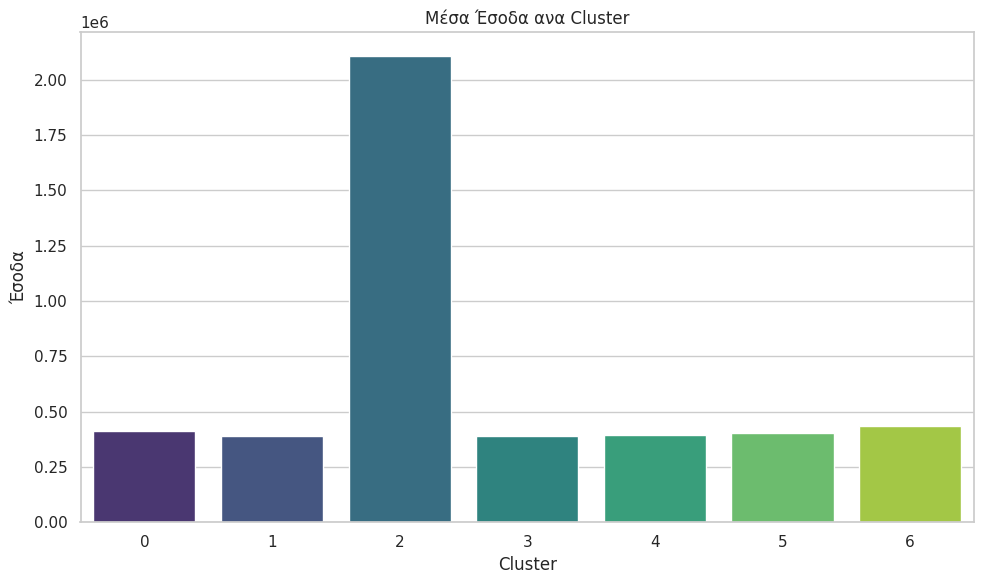

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(data = cluster_summary,
                 x = cluster_summary.index,
                 y = 'Μέσα Έσοδα',
                 palette = 'viridis')

ax.set_title('Μέσα Έσοδα ανα Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Έσοδα')
plt.tight_layout()
plt.show()

- **Μέση Ποσότητα Πωλήσεων ανα Cluster**

<ipython-input-252-f8249e449674>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = cluster_summary,


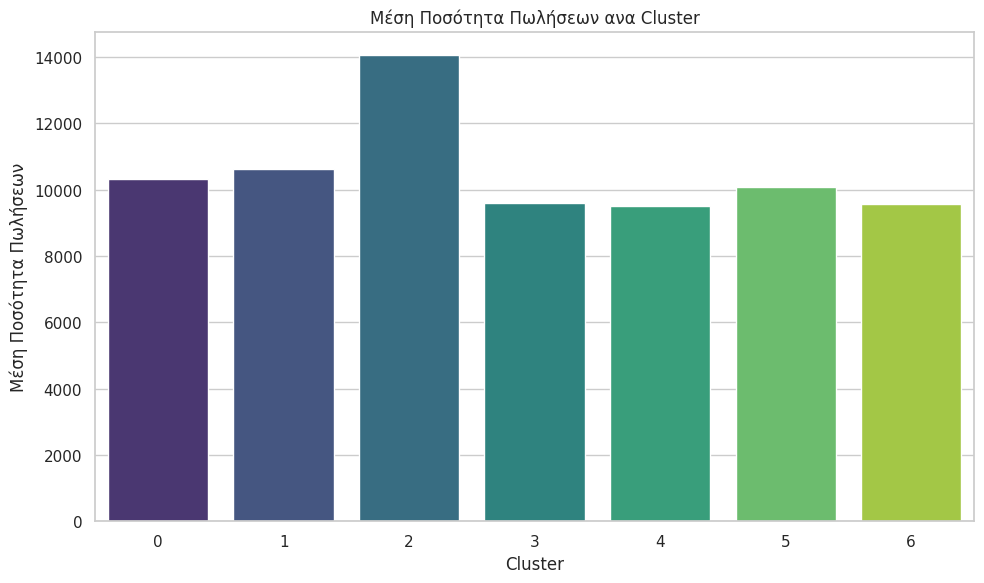

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(data = cluster_summary,
                 x = cluster_summary.index,
                 y = 'Μέση Ποσότητα Πωλήσεων',
                 palette = 'viridis')

ax.set_title('Μέση Ποσότητα Πωλήσεων ανα Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Μέση Ποσότητα Πωλήσεων')
plt.tight_layout()
plt.show()

- **Ποσοστά Γυναικών και Ανδρών ανά cluster**

<Figure size 1000x600 with 0 Axes>

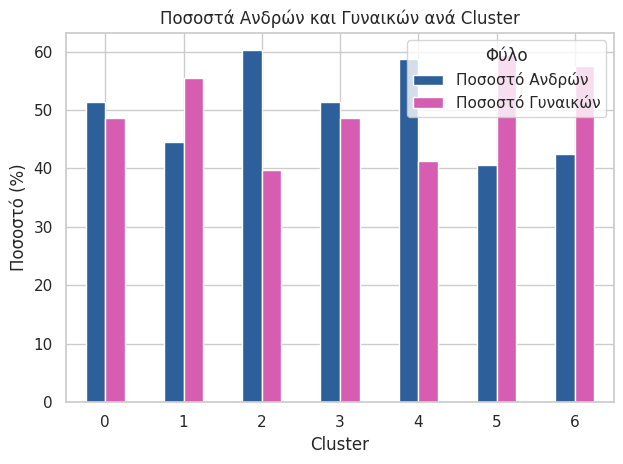

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(10, 6))
cluster_summary[['Ποσοστό Aνδρών', 'Ποσοστό Γυναικών']].plot(kind='bar', color=['#2D5F9A','#D65DB1'])
plt.title('Ποσοστά Ανδρών και Γυναικών ανά Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ποσοστό (%)')
plt.xticks(rotation=0)
plt.legend(title='Φύλο')
plt.tight_layout()
plt.show()

- **Ποσοστά Αγορών ανά Κατηγορία σε κάθε Cluster**

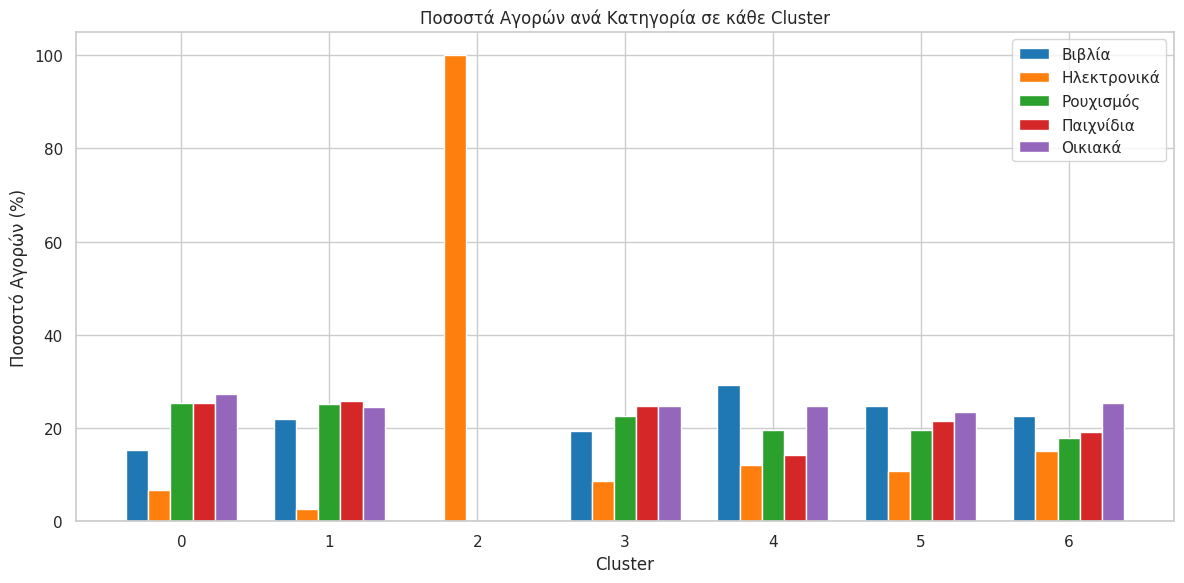

In [ ]:
categories = ['Βιβλία', 'Ηλεκτρονικά', 'Ρουχισμός', 'Παιχνίδια', 'Οικιακά']
cluster_labels = cluster_summary.index

width = 0.15
x = range(len(cluster_labels))

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, category in enumerate(categories):
    column_name = f'Ποσοστό αγορών από κατηγορία: {category}'
    ax.bar([xi + i * width for xi in x], cluster_summary[column_name], width, label=category, color=colors[i])

ax.set_xlabel('Cluster')
ax.set_ylabel('Ποσοστό Αγορών (%)')
ax.set_title('Ποσοστά Αγορών ανά Κατηγορία σε κάθε Cluster')
ax.set_xticks([xi + 2 * width for xi in x])
ax.set_xticklabels(cluster_labels)
ax.legend()
plt.tight_layout()
plt.show()

- **Ποσοστό Αγορών ανά Πλατφόρμα σε κάθε Cluster**

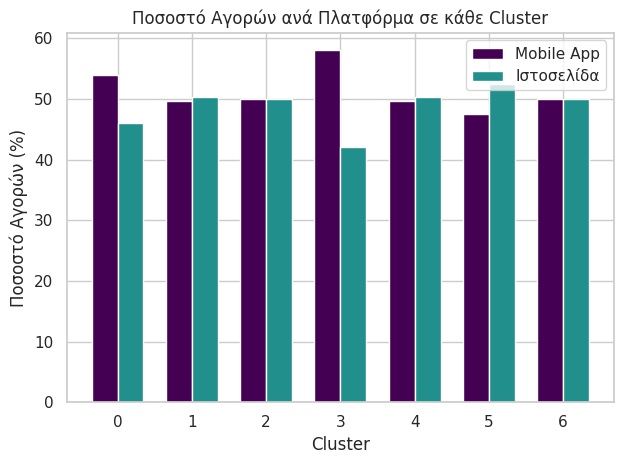

In [ ]:
width = 0.35
x = range(len(cluster_summary))
mobile_app_percentages = cluster_summary['Ποσοστό αγορών απο Mobile App']
website_percentages = cluster_summary['Ποσοστό αγορών απο Ιστοσελίδα']

plt.bar([i - width/2 for i in x], mobile_app_percentages, width, label='Mobile App', color='#440154')
plt.bar([i + width/2 for i in x], website_percentages, width, label='Ιστοσελίδα', color='#21908c')

plt.xlabel('Cluster')
plt.ylabel('Ποσοστό Αγορών (%)')
plt.title('Ποσοστό Αγορών ανά Πλατφόρμα σε κάθε Cluster')
plt.xticks(x, cluster_summary.index)
plt.legend()
plt.tight_layout()
plt.show()

- **Ποσοστά Περιοχής Πελάτη σε κάθε cluster**

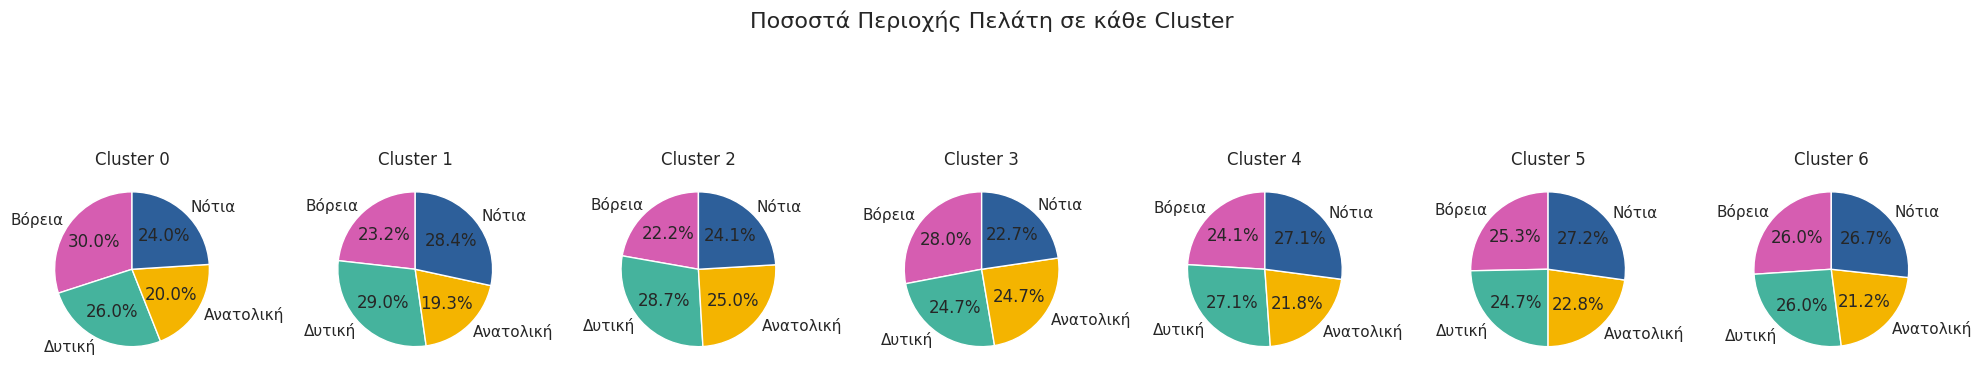

In [ ]:
fig, axes = plt.subplots(1, 7, figsize=(20, 5))
colors = ['#D65DB1', '#45B39D', '#F4B400', '#2D5F9A']

fig.suptitle('Ποσοστά Περιοχής Πελάτη σε κάθε Cluster', fontsize=16)

for i in range(7):
    cluster_data = cluster_summary.loc[i, ['Ποσοστό πελατών από Βόρεια', 'Ποσοστό πελατών από Δυτική', 'Ποσοστό πελατών από Ανατολική', 'Ποσοστό πελατών από Νότια']]
    labels = ['Βόρεια', 'Δυτική', 'Ανατολική', 'Νότια']

    axes[i].pie(cluster_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].set_title(f'Cluster {i}')

plt.tight_layout()
plt.show()


# **Μοντέλα πρόβλεψης**
---


In [ ]:
features = ['Ημερομηνία',
            'Εποχή',
            'Έσοδα']

pred_data = df[features].copy()

pred_data['Εποχή'] = pred_data['Εποχή'].map({'Άνοιξη':1,
                                             'Καλοκαίρι':2,
                                             'Φθινόπωρο':3,
                                             'Χειμώνας':4})

pred_data['Ημερομηνία'] = pd.to_datetime(pred_data['Ημερομηνία'])
pred_data['Μέρα Μήνα'] = pred_data['Ημερομηνία'].dt.day
pred_data['Μέρα Εβδομάδας'] = pred_data['Ημερομηνία'].dt.day_name()
pred_data['Μέρα Εβδομάδας'] = pred_data['Μέρα Εβδομάδας'].map({'Monday':1,
                                                               'Tuesday':2,
                                                               'Wednesday':3,
                                                               'Thursday':4,
                                                               'Friday':5,
                                                               'Saturday':6,
                                                               'Sunday':7})

pred_data['ΣΚ'] = pred_data['Μέρα Εβδομάδας'].apply(lambda x: 1 if x in {6, 7} else 0)

pred_data['Μήνας'] = pred_data['Ημερομηνία'].dt.month

pred_data['Εποχή'] = pred_data['Εποχή'].astype(int)
pred_data['Έσοδα'] = pred_data['Έσοδα'].astype(float)
pred_data['Καμπάνια Μάρκετινγκ'] = clustering_data['Καμπάνια Μάρκετινγκ']


order = ['Ημερομηνία', 'Μέρα Εβδομάδας' ,'ΣΚ' ,'Μέρα Μήνα', 'Μήνας' , 'Εποχή' , 'Καμπάνια Μάρκετινγκ', 'Έσοδα']

pred_data = pred_data[order]

pred_data.sort_values(by='Ημερομηνία', inplace=True)
pred_data.reset_index(inplace = True)
pred_data.drop(columns='index', inplace=True)

pred_df = pred_data.groupby('Ημερομηνία').agg({
    'Ημερομηνία': 'first',
    'Μέρα Εβδομάδας': 'first',
    'ΣΚ': 'first',
    'Μέρα Μήνα': 'first',
    'Μήνας': 'first',
    'Εποχή': 'first',
    'Καμπάνια Μάρκετινγκ': 'first',
    'Έσοδα': 'sum'
})

pred_df.reset_index(drop = True, inplace = True)

display(pred_df)

,Ημερομηνία,Μέρα Εβδομάδας,ΣΚ,Μέρα Μήνα,Μήνας,Εποχή,Καμπάνια Μάρκετινγκ,Έσοδα
0,2020-01-01,3,0,1,1,4,0,61160.0
1,2020-01-02,4,0,2,1,4,1,30640.0
2,2020-01-03,5,0,3,1,4,0,31510.0
3,2020-01-04,6,1,4,1,4,1,28790.0
4,2020-01-05,7,1,5,1,4,1,20710.0
...,...,...,...,...,...,...,...,...
339,2020-12-26,6,1,26,12,4,1,12950.0
340,2020-12-27,7,1,27,12,4,2,12170.0
341,2020-12-28,1,0,28,12,4,1,36450.0
342,2020-12-29,2,0,29,12,4,2,13800.0


In [ ]:
train_size = int(len(pred_df) * 0.95)
train_data = pred_df[:train_size]

test_data = pred_df[train_size:]
print('\nTrain Data:\n')
display(train_data)

print('\nTest Data:\n')
display(test_data)


Train Data:



,Ημερομηνία,Μέρα Εβδομάδας,ΣΚ,Μέρα Μήνα,Μήνας,Εποχή,Καμπάνια Μάρκετινγκ,Έσοδα
0,2020-01-01,3,0,1,1,4,0,61160.0
1,2020-01-02,4,0,2,1,4,1,30640.0
2,2020-01-03,5,0,3,1,4,0,31510.0
3,2020-01-04,6,1,4,1,4,1,28790.0
4,2020-01-05,7,1,5,1,4,1,20710.0
...,...,...,...,...,...,...,...,...
321,2020-12-08,2,0,8,12,4,1,24600.0
322,2020-12-09,3,0,9,12,4,2,28170.0
323,2020-12-10,4,0,10,12,4,1,9180.0
324,2020-12-11,5,0,11,12,4,0,4900.0



Test Data:



,Ημερομηνία,Μέρα Εβδομάδας,ΣΚ,Μέρα Μήνα,Μήνας,Εποχή,Καμπάνια Μάρκετινγκ,Έσοδα
326,2020-12-13,7,1,13,12,4,1,22210.0
327,2020-12-14,1,0,14,12,4,2,10880.0
328,2020-12-15,2,0,15,12,4,0,24480.0
329,2020-12-16,3,0,16,12,4,0,93730.0
330,2020-12-17,4,0,17,12,4,2,10760.0
331,2020-12-18,5,0,18,12,4,1,6400.0
332,2020-12-19,6,1,19,12,4,2,15970.0
333,2020-12-20,7,1,20,12,4,2,6570.0
334,2020-12-21,1,0,21,12,4,2,9490.0
335,2020-12-22,2,0,22,12,4,0,3240.0


In [ ]:
X_train = train_data.drop(columns=['Ημερομηνία', 'Έσοδα'])
y_train = train_data['Έσοδα']

X_test = test_data.drop(columns=['Ημερομηνία', 'Έσοδα'])
y_test = test_data['Έσοδα']

- **Random Forest**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Λίστα με μοντέλα
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor (SVR)": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

results = {}

# Εκπαίδευση και αξιολόγηση κάθε μοντέλου
for model_name, model in models.items():
    # Εκπαίδευση του μοντέλου
    model.fit(X_train, y_train)

    # Πρόβλεψη
    y_pred = model.predict(X_test)

    # Υπολογισμός των μετρικών
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Αποθήκευση αποτελεσμάτων
    results[model_name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Mean Absolute Percentage Error": mape
    }

# Εμφάνιση αποτελεσμάτων
print("Αποτελέσματα για τα διάφορα μοντέλα:\n")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value:.4f}")
    print()


Αποτελέσματα για τα διάφορα μοντέλα:

Random Forest:
  R2 Score: 0.0064
  Mean Squared Error: 516434865.5161
  Mean Absolute Error: 14780.7611
  Mean Absolute Percentage Error: 0.9458

Linear Regression:
  R2 Score: -0.0437
  Mean Squared Error: 542479424.4520
  Mean Absolute Error: 12803.1000
  Mean Absolute Percentage Error: 0.7432

Support Vector Regressor (SVR):
  R2 Score: -0.0906
  Mean Squared Error: 566814715.6503
  Mean Absolute Error: 12928.6624
  Mean Absolute Percentage Error: 0.7235

Decision Tree Regressor:
  R2 Score: -0.0288
  Mean Squared Error: 534703138.8889
  Mean Absolute Error: 16093.8889
  Mean Absolute Percentage Error: 1.0776

K-Neighbors Regressor:
  R2 Score: -0.1847
  Mean Squared Error: 615757997.7778
  Mean Absolute Error: 13899.1111
  Mean Absolute Percentage Error: 0.7999

